Name :Ilhe Uddhav Sampat | Batch : B3 | Roll no. : 4159

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.15.0


In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
len(train_labels)

60000

In [ ]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
len(test_labels)

10000

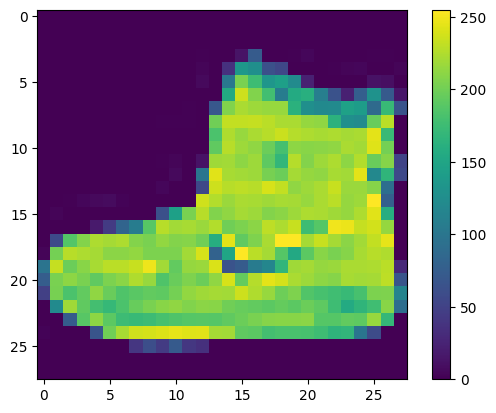

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0

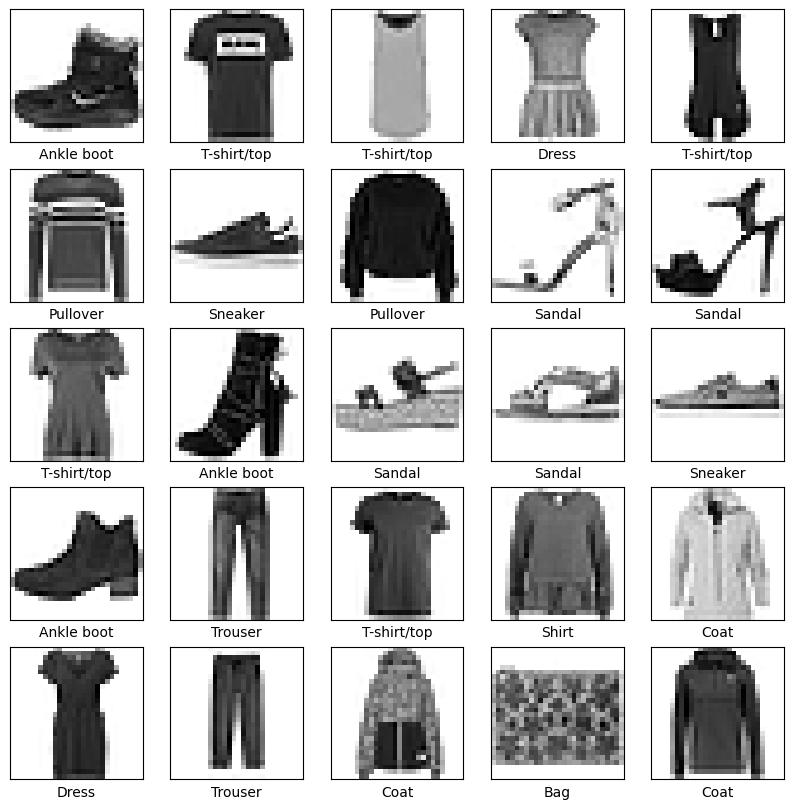

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
import tensorflow as tf
model = tf.keras.Sequential([
tf.keras.layers.Flatten(input_shape=(28, 28)),
tf.keras.layers.Dense(128, activation='relu'),
tf.keras.layers.Dense(10)
])

In [ ]:
model.compile(optimizer='adam',
loss=tf.keras.losses.
SparseCategoricalCrossentropy(from_logits=True),
metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, epochs=30)

Epoch 1/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4975 - accuracy: 0.8238
Epoch 2/30
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3739 - accuracy: 0.8639
Epoch 3/30
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3361 - accuracy: 0.8771
Epoch 4/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3113 - accuracy: 0.8850
Epoch 5/30
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2933 - accuracy: 0.8914
Epoch 6/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2784 - accuracy: 0.8963
Epoch 7/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2664 - accuracy: 0.9015
Epoch 8/30
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2583 - accuracy: 0.9032
Epoch 9/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2461 - accuracy: 0.9081
Epoch 10/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.239

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.4120 - accuracy: 0.8847 - 622ms/epoch - 2ms/step

Test accuracy: 0.8847000002861023


In [ ]:
probability_model = tf.keras.Sequential([model,
tf.keras.layers.Softmax()])

In [ ]:
predictions = probability_model.predict(test_images)


313/313 [==============================] - 0s 1ms/step


In [ ]:
predictions[0]

array([2.1964429e-12, 4.0216148e-17, 6.1392609e-14, 3.7199290e-15,
       5.7292461e-18, 2.1006183e-05, 9.3537848e-16, 6.7640467e-05,
       5.1644106e-12, 9.9991131e-01], dtype=float32)

In [ ]:
np.argmax(predictions[0])

9

In [ ]:
test_labels[0]

9

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img, cmap=plt.cm.binary)
  predicted_label = np.argmax(predictions_array)

  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
100*np.max(predictions_array),
class_names[true_label]),
color=color)
def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

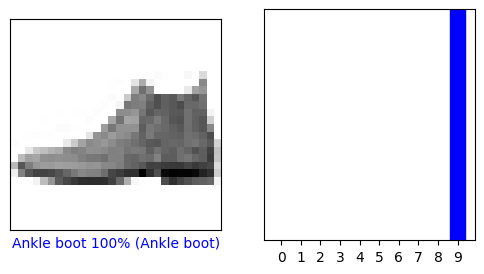

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

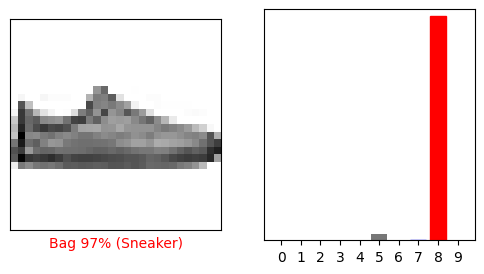

In [ ]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

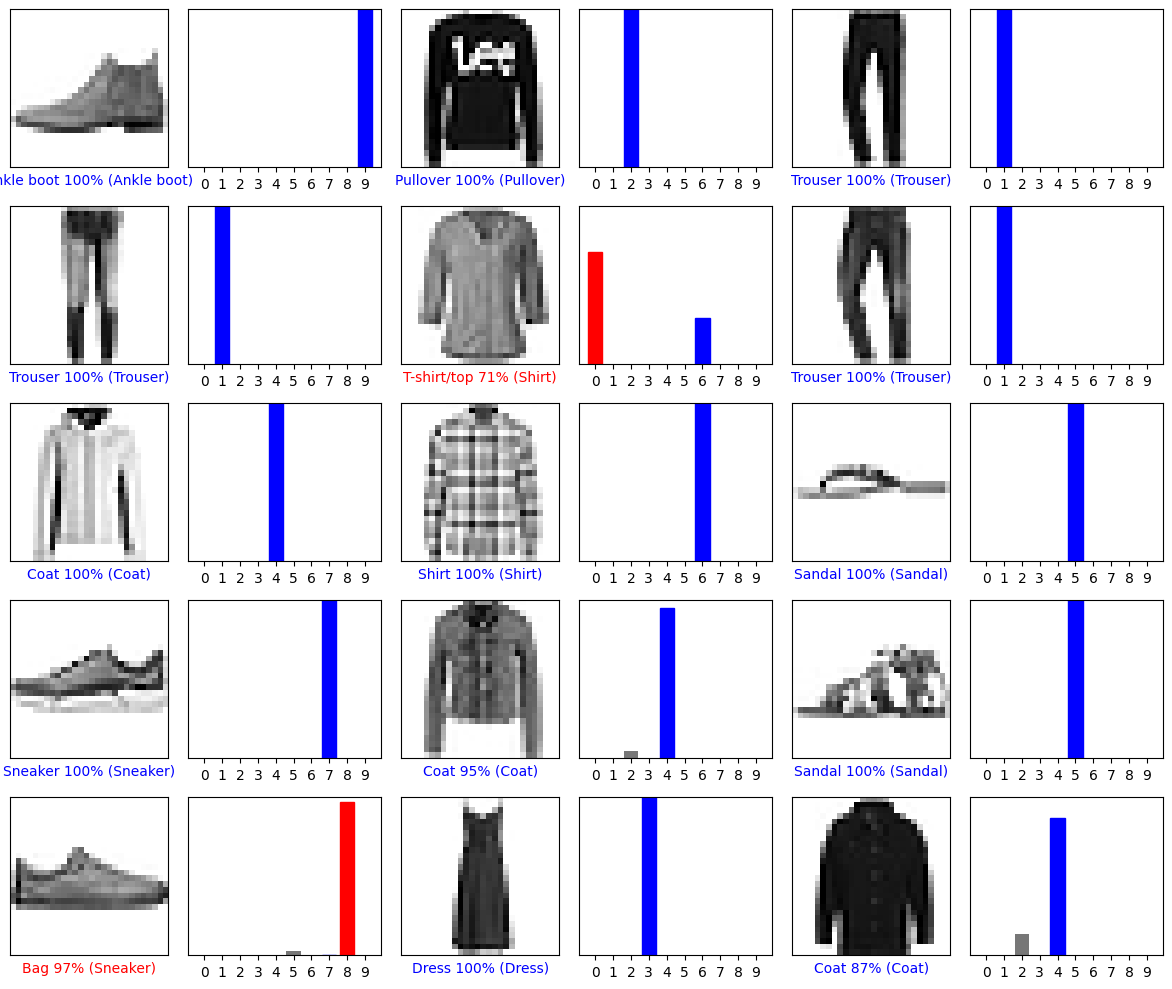

2.6

In [ ]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
  plt.tight_layout()
plt.show()
2.6

In [ ]:
#Grab an image from the test dataset.
img = test_images[1]
print(img.shape)

(28, 28)


In [ ]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [ ]:
predictions_single = probability_model.predict(img)
print(predictions_single)

1/1 [==============================] - 0s 26ms/step
[[6.0373795e-04 1.7264191e-17 9.9938548e-01 5.8309847e-17 8.4143803e-06
  1.0190069e-08 2.3110567e-06 3.4952586e-22 8.2321563e-13 7.7461522e-20]]


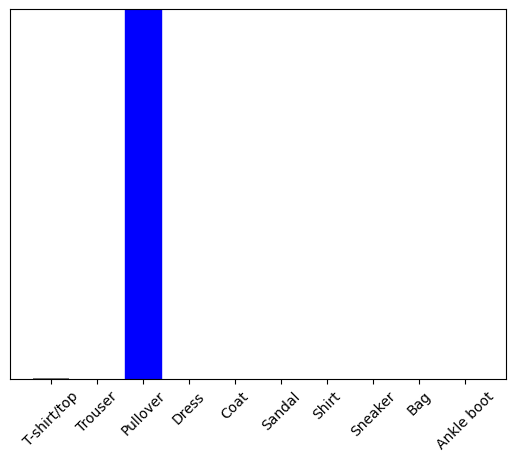

In [ ]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [ ]:
np.argmax(predictions_single[0])

2